In [1]:
#pip install tensorflow

In [2]:
#pip install keras

In [3]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

In [4]:
keras.datasets.fashion_mnist.load_data()[0][1]


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:
x_train[0].shape

(28, 28)

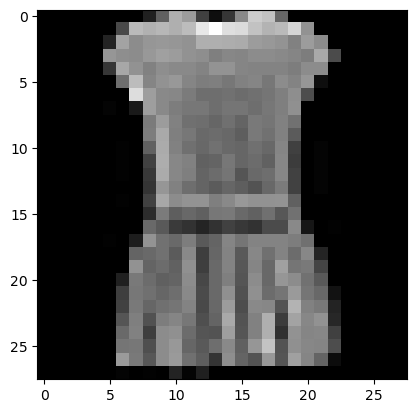

In [7]:
plt.imshow(x_train[3], cmap="gray")

In [8]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [9]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
keras.utils.to_categorical(y_train, num_classes)[1]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
keras.utils.to_categorical(y_test, num_classes)[2]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [14]:
batch_size = 250
epochs = 20

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
216/216 [==============================] - 16s 71ms/step - loss: 0.7550 - accuracy: 0.7332 - val_loss: 0.4729 - val_accuracy: 0.8300
Epoch 2/20
216/216 [==============================] - 15s 68ms/step - loss: 0.4534 - accuracy: 0.8372 - val_loss: 0.4327 - val_accuracy: 0.8403
Epoch 3/20
216/216 [==============================] - 15s 69ms/step - loss: 0.4007 - accuracy: 0.8560 - val_loss: 0.3676 - val_accuracy: 0.8692
Epoch 4/20
216/216 [==============================] - 16s 76ms/step - loss: 0.3734 - accuracy: 0.8670 - val_loss: 0.3549 - val_accuracy: 0.8733
Epoch 5/20
216/216 [==============================] - 17s 81ms/step - loss: 0.3508 - accuracy: 0.8746 - val_loss: 0.3391 - val_accuracy: 0.8780
Epoch 6/20
216/216 [==============================] - 16s 72ms/step - loss: 0.3357 - accuracy: 0.8786 - val_loss: 0.3256 - val_accuracy: 0.8808
Epoch 7/20
216/216 [==============================] - 15s 71ms/step - loss: 0.3189 - accuracy: 0.8850 - val_loss: 0.3100 - val_accuracy:

In [16]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.26273372769355774
Test accuracy: 0.9035000205039978


In [17]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.20534835755825043
Test accuracy: 0.9275000095367432


In [18]:
import matplotlib.pyplot as plt

In [19]:
print(history.history.keys()) 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


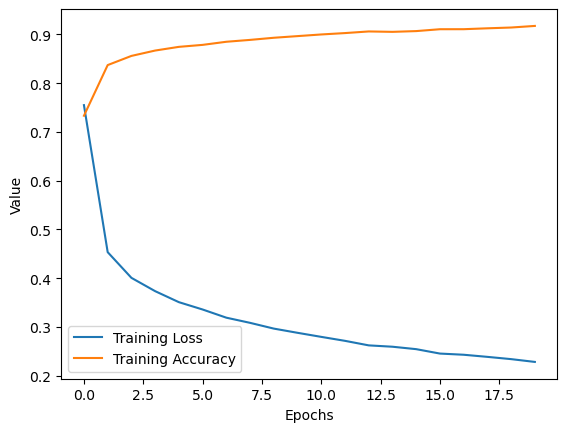

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

In [35]:
from sklearn.metrics import multilabel_confusion_matrix

In [36]:
pred_y = model.predict(x_test)
conf_matrices = multilabel_confusion_matrix(y_test, pred_y)

313/313 [==============================] - 2s 5ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

In [33]:
for i, conf_matrix in enumerate(conf_matrices):
    print(f"Confusion matrix for class {i}:")
    print(conf_matrix)

313/313 [==============================] - 1s 5ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets